In [ ]:
ANALYSIS
# There is a strong positive correlation between the mouse wieght and average tumor volume size, 
# this shows that when the mouse weight increases the average tumor volume also increases
# based on the data, it seems that capomulin and ramicane were most effective in lowering final tumor volume

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [3]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv("data/Mouse_metadata.csv")
study_results = pd.read_csv("data/Study_results.csv")


# Combine the data into a single DataFrame
combined_data = pd.merge(study_results, mouse_metadata)

# Display the data table for preview

combined_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [4]:
# Checking the number of mice.
micecount = mouse_metadata["Mouse ID"].count()
micecount

249

In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint

# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = combined_data[combined_data.duplicated(['Mouse ID', 'Timepoint'])]
duplicate.head()



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 

In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_data[(combined_data["Mouse ID"] != "g989")]
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [8]:
# Checking the number of mice in the clean DataFrame.
mice_count = len(clean_df["Mouse ID"].unique())
mice_count

248

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

groupby_reg = clean_df.groupby(["Drug Regimen"])
mean = groupby_reg["Tumor Volume (mm3)"].mean()
median = groupby_reg["Tumor Volume (mm3)"].median()
variance = groupby_reg["Tumor Volume (mm3)"].var()
std_dev = groupby_reg["Tumor Volume (mm3)"].std()
SEM = groupby_reg["Tumor Volume (mm3)"].sem()
summary = pd.DataFrame({'Mean Tumor Volume': mean,
                       'Median Tumor Volume': median,
                       'Tumor Volume Variance' : variance,
                       'Tumor Volume Std. Dev' : std_dev,
                       'Tumor Volume Std. Err.' : SEM})
summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

total_df = clean_df.groupby("Drug Regimen")[["Timepoint"]].count ()

total_df

,Timepoint
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,148
Ramicane,228
Stelasyn,181


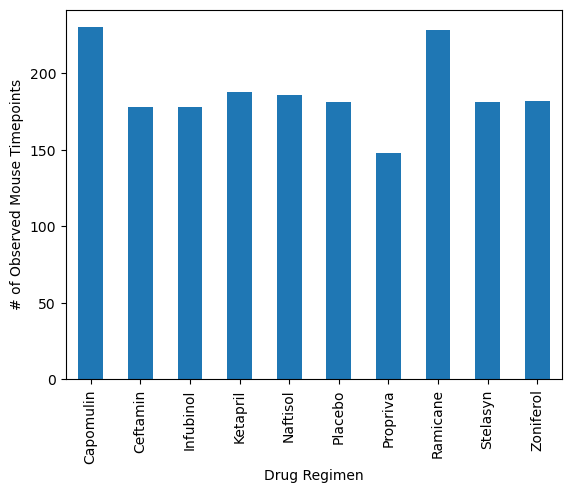

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
total_df.plot(kind="bar", legend=False,
              ylabel = "# of Observed Mouse Timepoints")

plt.show()

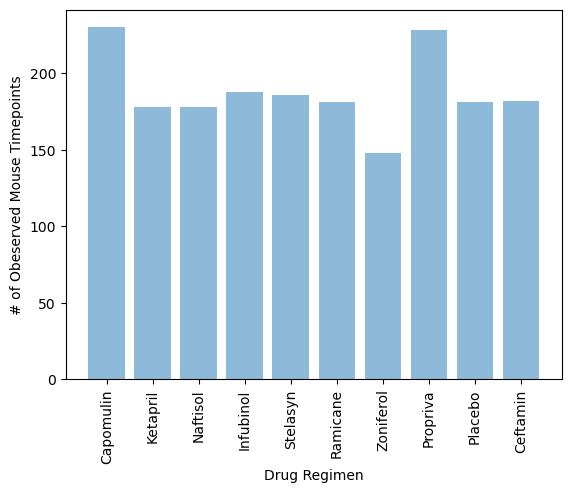

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

    
x_axis = np.arange(len(total_df))
tick_locations = [value for value in x_axis]

plt.bar(x_axis, total_df["Timepoint"], alpha=0.5, align="center")
plt.xticks(tick_locations, ['Capomulin', 'Ketapril', 'Naftisol', 'Infubinol', 'Stelasyn',
       'Ramicane', 'Zoniferol', 'Propriva', 'Placebo', 'Ceftamin'],rotation ="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Obeserved Mouse Timepoints")
plt.show()

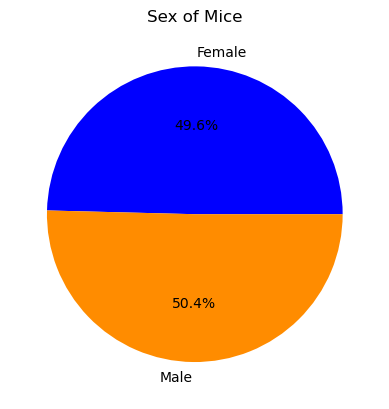

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex = clean_df.groupby("Sex").nunique()
sex_chart = sex["Mouse ID"].plot(
    kind="pie",label="" ,title="Sex of Mice", autopct='%1.1f%%',legend=False,colors=["blue","darkorange"])

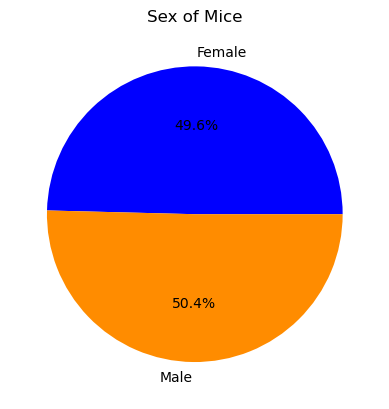

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex["Mouse ID"], labels=sex.index,autopct='%1.1f%%',colors=["blue","darkorange"])
plt.title("Sex of Mice")
plt.show()

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


# Start by getting the last (greatest) timepoint for each mouse
mouse_id = clean_df.groupby(["Mouse ID"])['Timepoint'] \
                   .max() \
                   .reset_index()
mouse_id

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
243,z435,10
244,z578,45
245,z581,45
246,z795,45


In [17]:
## Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_vol_df = mouse_id.merge(clean_df, on = ['Mouse ID', 'Timepoint'], how = 'left')
tumor_vol_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [61]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin","Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for drug in treatments :
    drugs = tumor_vol_df.loc[tumor_vol_df["Drug Regimen"]==drug,["Tumor Volume (mm3)"]]
    quartiles = drugs.quantile([.25,.5,.75])
    lowerq = quartiles.loc[0.25]
    upperq = quartiles.loc[0.75]
    iqr = upperq - lowerq
    
    print (drug)
    print(f"The lower quartile is: {lowerq}")
    print(f"The upper quartile is: {upperq}")
    print(f"The interquartile range is: {iqr}")


    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    
    tum_vol = drugs.loc[(drugs["Tumor Volume (mm3)"]< lower_bound.values[0]) | (drugs["Tumor Volume (mm3)"]> upper_bound.values[0])]
    # add subset 
    drugs = drugs.loc[:,"Tumor Volume (mm3)"]
    tumor_vol.append(drugs)
    
    # Determine outliers using upper and lower bounds


Capomulin
The lower quartile is: Tumor Volume (mm3)    32.377357
Name: 0.25, dtype: float64
The upper quartile is: Tumor Volume (mm3)    40.15922
Name: 0.75, dtype: float64
The interquartile range is: Tumor Volume (mm3)    7.781863
dtype: float64
Values below Tumor Volume (mm3)    20.704562
dtype: float64 could be outliers.
Values above Tumor Volume (mm3)    51.832015
dtype: float64 could be outliers.
Ramicane
The lower quartile is: Tumor Volume (mm3)    31.56047
Name: 0.25, dtype: float64
The upper quartile is: Tumor Volume (mm3)    40.659006
Name: 0.75, dtype: float64
The interquartile range is: Tumor Volume (mm3)    9.098537
dtype: float64
Values below Tumor Volume (mm3)    17.912664
dtype: float64 could be outliers.
Values above Tumor Volume (mm3)    54.306811
dtype: float64 could be outliers.
Infubinol
The lower quartile is: Tumor Volume (mm3)    54.048608
Name: 0.25, dtype: float64
The upper quartile is: Tumor Volume (mm3)    65.525743
Name: 0.75, dtype: float64
The interquartile

C:\Users\Manro\AppData\Local\Temp\ipykernel_24048\1706639517.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(treatments)


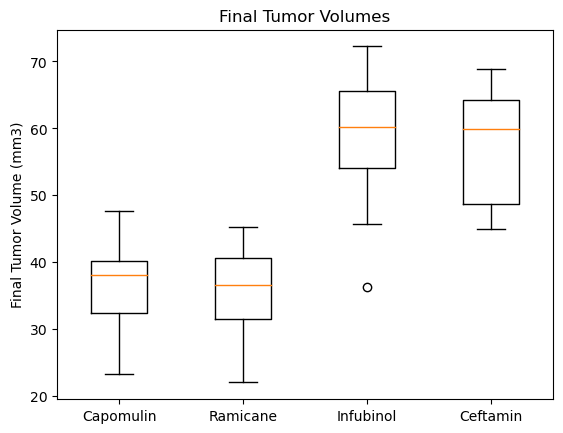

In [65]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volumes')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xticklabels(treatments)
bp = ax1.boxplot(tumor_vol)
plt.show()

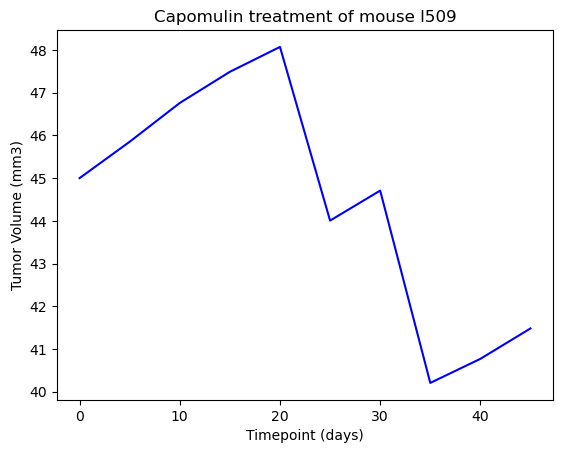

In [89]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin = clean_df.loc[clean_df["Mouse ID"]== "l509",:]
x_ax = capomulin["Timepoint"]
y_ax = capomulin["Tumor Volume (mm3)"]

fig2, ax2 = plt.subplots()
ax2.set_title ("Capomulin treatment of mouse l509" )
ax2.set_ylabel('Tumor Volume (mm3)')
ax2.set_xlabel('Timepoint (days)')
ax2.plot(x_ax,y_ax,color="blue")
plt.show()

Text(0, 0.5, 'Average Tumor Volume (mm3)')

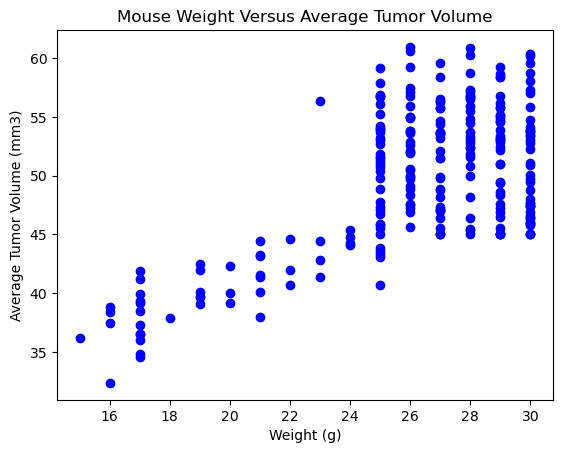

In [94]:
 # Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
avgcap_vol = clean_df.loc[clean_df["Drug Regimen"] =="Capomulin", :].groupby("Mouse ID")[["Weight (g)","Tumor Volume (mm3)"]].mean()

#marker_size=15
plt.scatter(avg_cap_vol['Weight (g)'],avg_cap_vol['Tumor Volume (mm3)'], color="blue")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')


In [95]:
avgcap_vol

,Weight (g),Tumor Volume (mm3)
Mouse ID,,
b128,22.0,41.963636
b742,21.0,40.083699
f966,17.0,36.505973
g288,19.0,41.990097
g316,22.0,44.613344
i557,24.0,44.805810
i738,20.0,39.141053
j119,23.0,44.465236
j246,21.0,43.216925


In [98]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

correlation = st.pearsonr(avg_cap_vol['Weight (g)'],avg_cap_vol['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

The correlation between mouse weight and the average tumor volume is 0.66


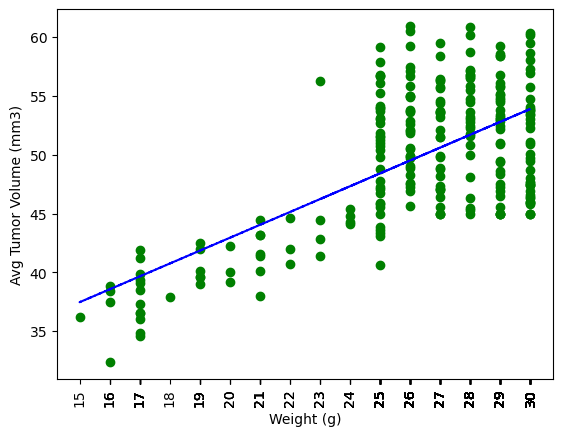

In [101]:
cap_slope, cap_int, cap_r, cap_p, cap_std_err = st.linregress(avg_cap_vol["Weight (g)"],avg_cap_vol["Tumor Volume (mm3)"])
cap_fit = cap_slope * avg_cap_vol["Weight (g)"] + cap_int
plt.scatter(avg_cap_vol["Weight (g)"],avg_cap_vol["Tumor Volume (mm3)"],color="g")
plt.plot(avg_cap_vol["Weight (g)"],cap_fit,"--",color="b")
plt.xticks(avg_cap_vol["Weight (g)"], rotation=90)
plt.xlabel("Weight (g)")
plt.ylabel("Avg Tumor Volume (mm3)")
plt.show()